In [1]:
import os
os.environ["SENTENCE_TRANSFORMERS_HOME"] = r'D:\AI-DATASETS\07-Hugging-Face-Data\sentence-transformers'

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

- The transformer itself, here we can see the max sequence length of 128 tokens and whether to lowercase any input (in this case, the model does not). We can also see the model class, BertModel.

- The pooling operation, here we can see that we are producing a 768-dimensional sentence embedding. We are doing this using the mean pooling method.

Once we have the model, building sentence embeddings is quickly done using the encode method.

In [3]:
sentences = [
    "the fifty mannequin heads floating in the pool kind of freaked them out",
    "she swore she just saw her sushi move",
    "he embraced his new life as an eggplant",
    "my dentist tells me that chewing bricks is very bad for your teeth",
    "the dental specialist recommended an immediate stop to flossing with construction materials"
]

In [4]:
embeddings = model.encode(sentences)

embeddings.shape

(5, 768)

We now have sentence embeddings that we can use to quickly compare sentence similarity for the use cases introduced at the start of the article; STS, semantic search, and clustering.

We can put together a fast STS example using nothing more than a cosine similarity function and Numpy.

In [5]:
import numpy as np
from sentence_transformers.util import cos_sim

In [6]:
sim = np.zeros((len(sentences), len(sentences)))

In [7]:
for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.40914318, 1.        , 0.        , 0.        , 0.        ],
       [0.10909029, 0.44547972, 1.00000024, 0.        , 0.        ],
       [0.50074875, 0.30693939, 0.20791668, 1.00000012, 0.        ],
       [0.29936227, 0.38607216, 0.28499275, 0.63849503, 1.        ]])

In [8]:
import seaborn as sns

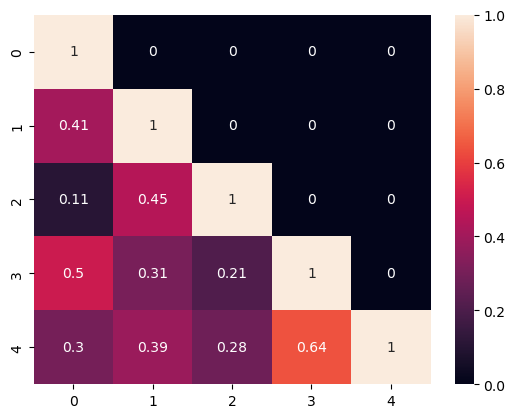

In [12]:
sns.heatmap(sim, annot=True);

e can see the highest similarity score in the bottom-right corner with 0.64. As we would hope, this is for sentences 4 and 3, which both describe poor dental practices using construction materials.

In [14]:
from sentence_transformers import SentenceTransformer

mpnet = SentenceTransformer('all-mpnet-base-v2')

mpnet

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

max_seq_length has increased from 128 to 384. Meaning we can process sequences that are three times longer than we could with SBERT.

The base model is now MPNetModel [4] not BertModel.

There is an additional normalization layer applied to sentence embeddings.

In [15]:
embeddings = mpnet.encode(sentences)

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[ 1.00000012,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.26406282,  1.00000012,  0.        ,  0.        ,  0.        ],
       [ 0.16503491,  0.16126692,  1.00000012,  0.        ,  0.        ],
       [ 0.04334463,  0.04615868,  0.0567013 ,  1.        ,  0.        ],
       [ 0.05398503,  0.06101183, -0.0112226 ,  0.51847208,  1.00000012]])

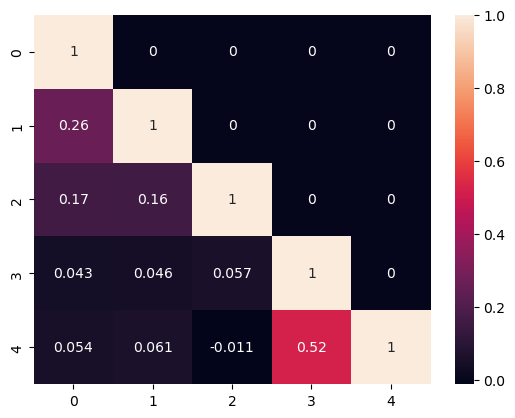

In [16]:
sns.heatmap(sim, annot=True);